In [1]:
from TextNormalizer import TextNormalizer
from Storage import Storage
from gensim import corpora
from pprint import pprint
from IPython.display import Image
import os
import ipywidgets

In [3]:
def query_to_vec(self, normalized_query: [str]):
    return self.dictionary.doc2bow(normalized_query)

def perform_search(normalized_query: [str]):
    index = similarities.Similarity(
        corpus=lsi[corpus],
        shardsize=20,
        num_features=dictionary.num_pos)

    query_vec = query_to_vec(normalized_query)
    query = lsi[query_vec]
    sims = index[query]
    sims = sorted(enumerate(sims), key=lambda item: -item[1])
    return sims

In [4]:
path = 'out/lsi'
model_name = 'phyge'
lsi = Storage.load_model(path, 'phyge', 'lsi')
dictionary = corpora.Dictionary.load(os.path.join(path, f'{model_name}.dict'))
corpus = corpora.MmCorpus(os.path.join(path, f'{model_name}.mm'))

phyge.lsi model loading...


Loaded


In [34]:
query = 'эмоциональный интелект'
query = 'хочу перемен. я не на своем месте. Карьерная стратегия'
query = 'хочу перемен. Избавиться от депрессии. качество жизни. распознавать эмоции. Быть на высоте. Привычки успешных людей'

amount = 2
normalized_query = TextNormalizer.normalize(query)
print(normalized_query)

['хотеть', 'перемена', 'избавиться', 'депрессия', 'качество', 'жизнь', 'распознавать', 'эмоция', 'высота', 'привычка', 'успешный', 'человек']


In [35]:
similarities = lsi.perform_search(normalized_query=normalized_query)
articles = lsi.training_sample.articles
found_articles = list()
for index, similarity in similarities[:amount]:
    answer = {
        'title': articles[index].title,
        'source': articles[index].source,
        'text': (articles[index].text[0:200]) \
                    .replace("[", '') \
                + '...',
        'similarity': round(float(similarity), 3)}
    found_articles.append(answer)

In [36]:
pprint(found_articles)

[{'similarity': 0.746,
  'source': 'https://www.mann-ivanov-ferber.ru/books/vosxodyashhaya-spiral/?buytab=paperbook',
  'text': ' Как нейрофизиология помогает справиться с негативом и депрессией — '
          'шаг за шагомПоможет избавиться от депрессии. Современная '
          'нейробиология и практические советы. Предисловие Дэниела Сигела, '
          'автора кн...',
  'title': 'Восходящая спираль'},
 {'similarity': 0.601,
  'source': 'https://www.mann-ivanov-ferber.ru/books/put-vyidayushhixsya-lyudej/?buytab=paperbook',
  'text': ' Убеждения, принципы, привычки6 принципов незаурядных и '
          'высоко-эффективных людей. Основана на исследованиях, опросах и '
          'личном опыте. Упражнения и повседневные практики: действуйте сразу '
          'жеШесть привы...',
  'title': 'Путь выдающихся людей'}]


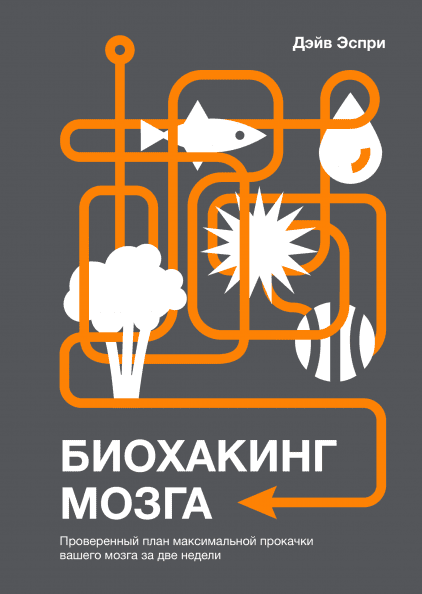

In [38]:
Image("Tests/test_mif/img/1.00x-thumb.png")